In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data Loading and PreProcessing

In [50]:
data = pd.read_csv("datasets/electricity.csv")
print(data.head())


                  date     0     1      2      3      4       5     6       7  \
0  2016-07-01 02:00:00  14.0  69.0  234.0  415.0  215.0  1056.0  29.0   840.0   
1  2016-07-01 03:00:00  18.0  92.0  312.0  556.0  292.0  1363.0  29.0  1102.0   
2  2016-07-01 04:00:00  21.0  96.0  312.0  560.0  272.0  1240.0  29.0  1025.0   
3  2016-07-01 05:00:00  20.0  92.0  312.0  443.0  213.0   845.0  24.0   833.0   
4  2016-07-01 06:00:00  22.0  91.0  312.0  346.0  190.0   647.0  16.0   733.0   

       8  ...    311    312      313     314     315   316   317     318  \
0  226.0  ...  676.0  372.0  80100.0  4719.0  5002.0  48.0  38.0  1558.0   
1  271.0  ...  805.0  452.0  95200.0  4643.0  6617.0  65.0  47.0  2177.0   
2  270.0  ...  817.0  430.0  96600.0  4285.0  6571.0  64.0  43.0  2193.0   
3  179.0  ...  801.0  291.0  94500.0  4222.0  6365.0  65.0  39.0  1315.0   
4  186.0  ...  807.0  279.0  91300.0  4116.0  6298.0  75.0  40.0  1378.0   

     319      OT  
0  182.0  2162.0  
1  253.0  2835.0  

(26304, 322)


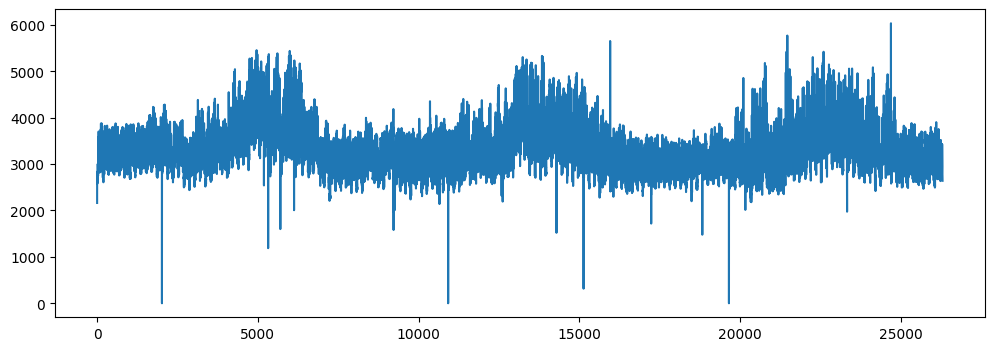

In [51]:
print(data.shape)
plt.figure(figsize=(12, 4))
plt.plot(data['OT'])
plt.show()


In [52]:
df = data[['date',"OT"]]
df.head()

,date,OT
0,2016-07-01 02:00:00,2162.0
1,2016-07-01 03:00:00,2835.0
2,2016-07-01 04:00:00,2764.0
3,2016-07-01 05:00:00,2735.0
4,2016-07-01 06:00:00,2721.0


In [53]:
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)



C:\Users\Dell\AppData\Local\Temp\ipykernel_10360\1889305375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [54]:

# Resample the data to daily frequency and sum the values
daily_df = df.resample('D').sum()

# Print the resulting daily data
daily_df.head()

,OT
date,
2016-07-01,60421.0
2016-07-02,75821.0
2016-07-03,80360.0
2016-07-04,77002.0
2016-07-05,79305.0


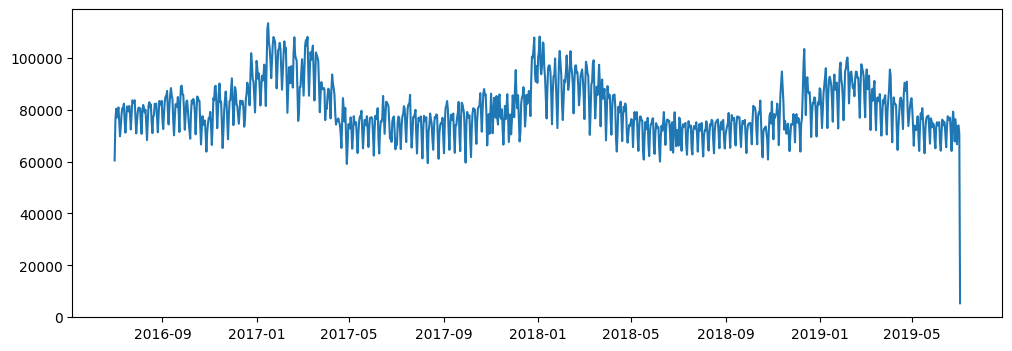

In [55]:
plt.figure(figsize=(12, 4))
plt.plot(daily_df['OT'])
plt.show()

In [56]:
df1 = daily_df.drop(daily_df.index[-1])

In [57]:
df1.isna().sum()

OT    0
dtype: int64

In [60]:
df1.tail()

,OT
date,
2019-06-27,71169.0
2019-06-28,66689.0
2019-06-29,73596.0
2019-06-30,73940.0
2019-07-01,70874.0


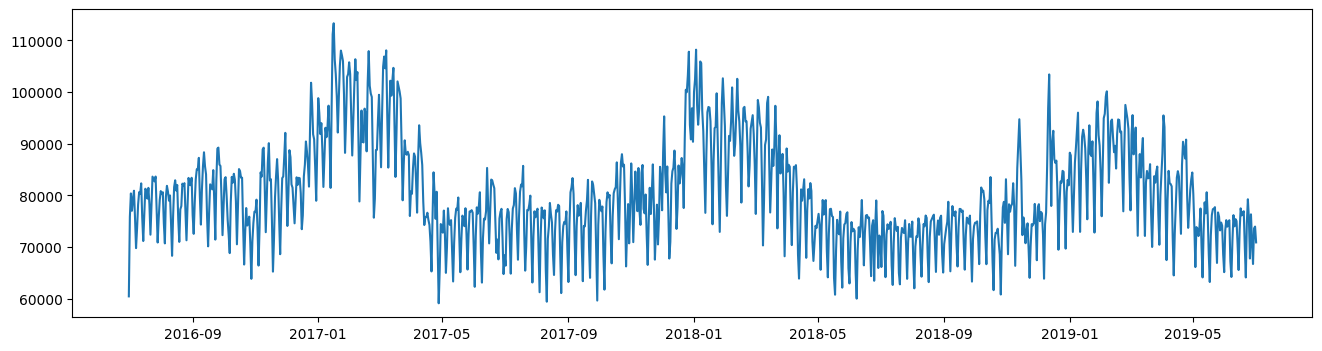

In [61]:
plt.figure(figsize=(16, 4))
plt.plot(df1['OT'])
plt.show()

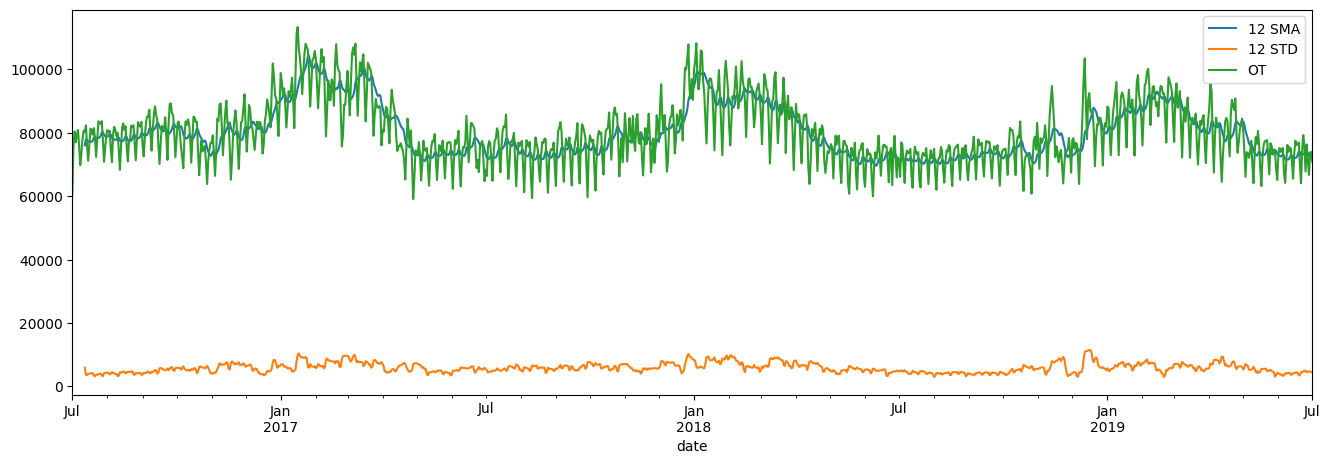

In [63]:
df1.OT.rolling(12).mean().plot(label='12 SMA',figsize=(16,5))
df1.OT.rolling(12).std().plot(label='12 STD')
df1.OT.plot()
plt.legend()

As seen from the above plot, the standard deviation is not varying much so there is not much variance.

In [64]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(df1)
print("Augmented Dickey-Fuller Test:")
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


Augmented Dickey-Fuller Test:
ADF Statistic: -2.3889858073437438
p-value: 0.144869245048232


Data is non stationary.

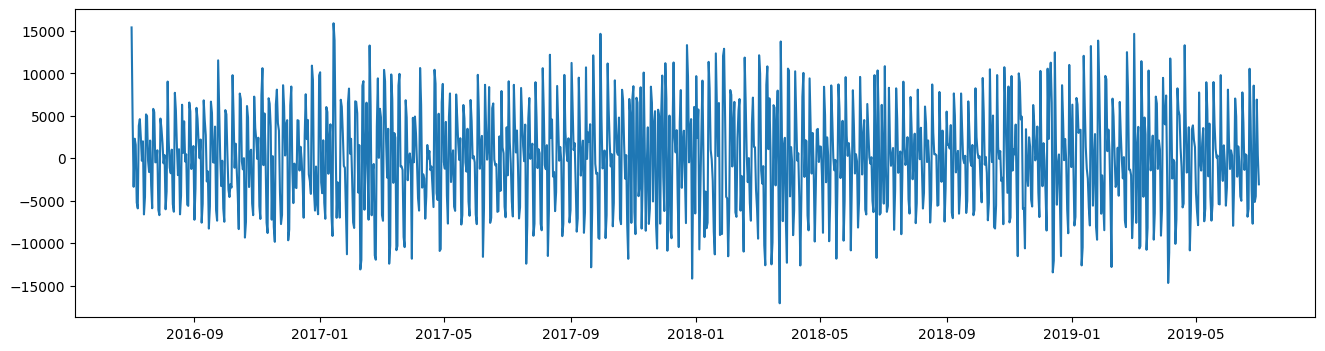

In [66]:
plt.figure(figsize=(16, 4))
plt.plot(df1.diff())
plt.show()

In [68]:
first_diff = adfuller(df1.diff().dropna())
print("Augmented Dickey-Fuller Test:")
print(f'ADF Statistic: {first_diff[0]}')
print(f'p-value: {first_diff[1]}')

Augmented Dickey-Fuller Test:
ADF Statistic: -8.728646129058388
p-value: 3.236539482854291e-14


Seasonal Differencing

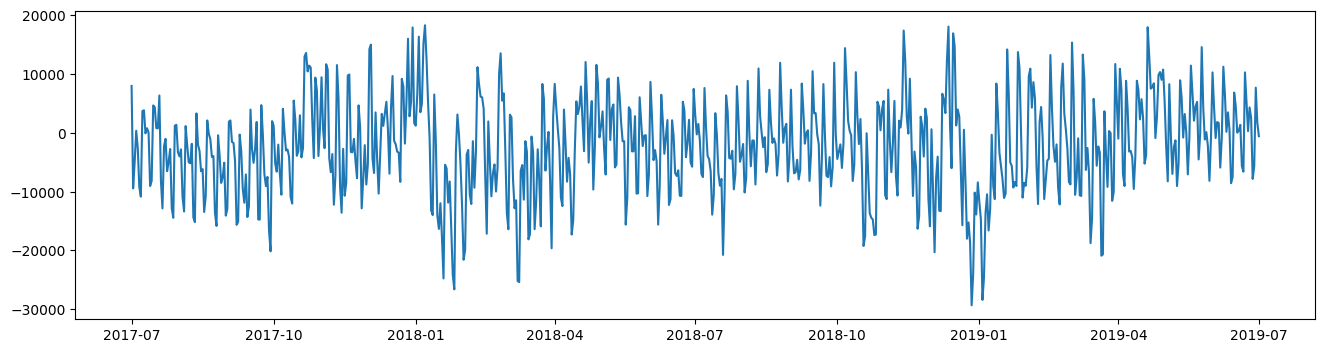

In [76]:
plt.figure(figsize=(16, 4))
plt.plot(df1.diff(365))
plt.show()

In [77]:
seas_diff = adfuller(df1.diff(365).dropna())
print("Augmented Dickey-Fuller Test:")
print(f'ADF Statistic: {seas_diff[0]}')
print(f'p-value: {seas_diff[1]}')

Augmented Dickey-Fuller Test:
ADF Statistic: -6.25376925752955
p-value: 4.389315651221063e-08


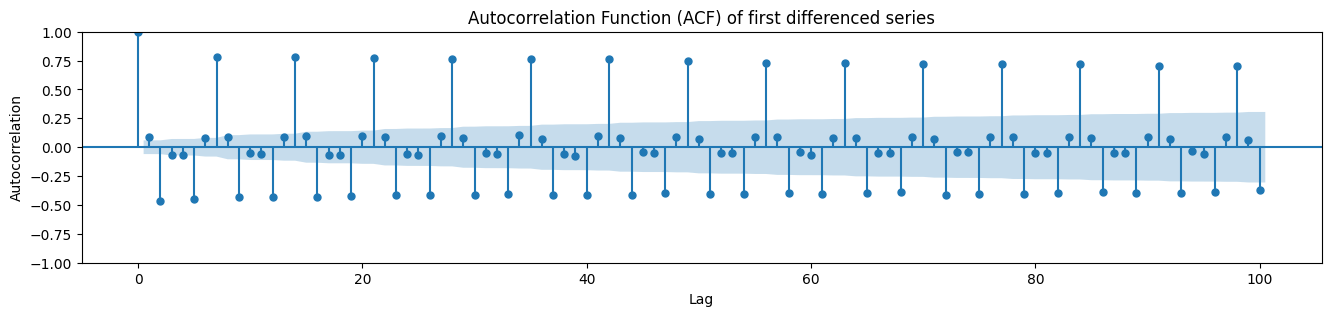

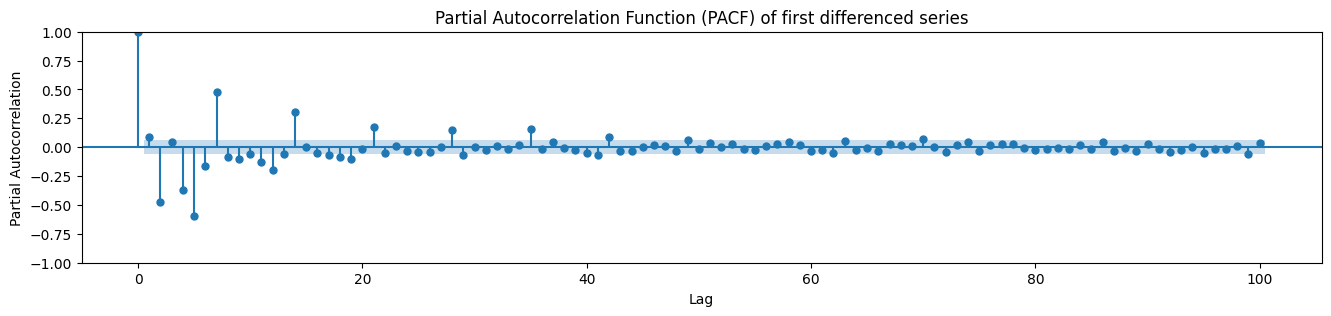

In [87]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

first_diff_series = df1.diff().dropna()
fig, ax = plt.subplots(figsize=(16, 3))
plot_acf(first_diff_series, ax=ax, lags=100)
plt.title('Autocorrelation Function (ACF) of first differenced series')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()
fig, ax = plt.subplots(figsize=(16, 3))
plot_pacf(first_diff_series, ax=ax, lags=100)
plt.title('Partial Autocorrelation Function (PACF) of first differenced series')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

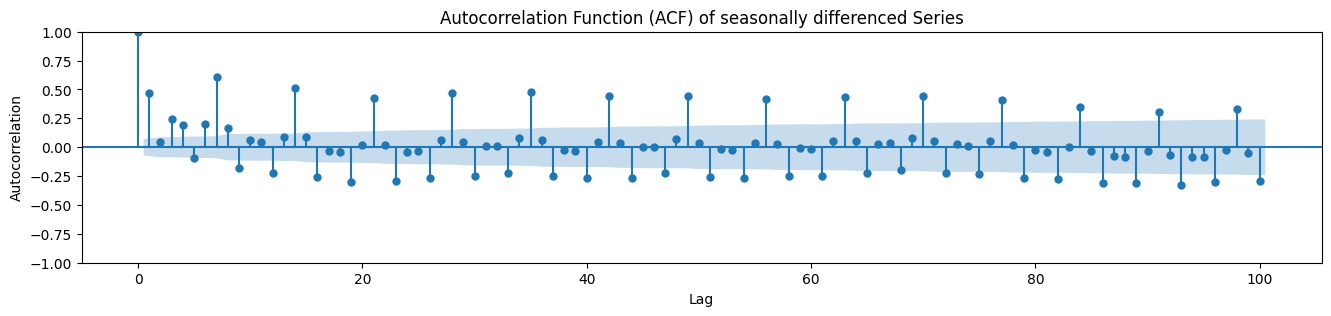

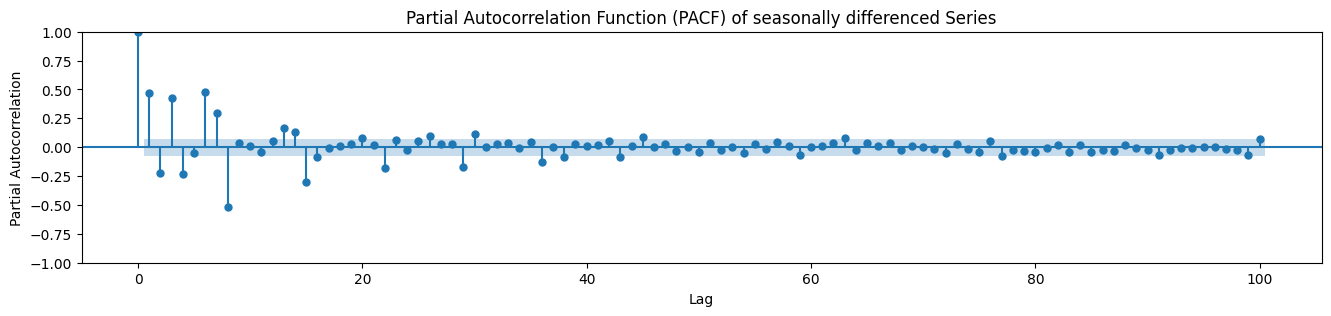

In [89]:
seas_diff_series = df1.diff(365).dropna()
fig, ax = plt.subplots(figsize=(16, 3))
plot_acf(seas_diff_series, ax=ax, lags=100)
plt.title('Autocorrelation Function (ACF) of seasonally differenced Series')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()
fig, ax = plt.subplots(figsize=(16, 3))
plot_pacf(seas_diff_series, ax=ax, lags=100)
plt.title('Partial Autocorrelation Function (PACF) of seasonally differenced Series')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [96]:
from pmdarima import auto_arima
best_model = auto_arima(df1, seasonal=True, d=1, D=1, m=7, information_criterion='aic', trace=True)
print(best_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[7]             : AIC=inf, Time=5.41 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=21118.263, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=20882.907, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=20639.913, Time=1.20 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=21113.543, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=1.78 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=20626.593, Time=2.87 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=6.55 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=20627.816, Time=0.85 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=20621.281, Time=4.07 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=2.27 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=inf, Time=7.62 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=20603.267, Time=3.98 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=20881.054, Time=0.98 sec
 ARIMA(1,1,1)(2,1,1)[7]             : AIC=inf, Ti

In [97]:
print(best_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1096
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -10296.633
Date:                           Thu, 10 Aug 2023   AIC                          20603.267
Time:                                   20:48:31   BIC                          20628.227
Sample:                               07-01-2016   HQIC                         20612.715
                                    - 07-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8565      0.033     25.695      0.000       0.791       0.922
ma.L1         -0.9399      0.027    -34.202

In [90]:
print(len(df1))

1096


In [108]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Splitting data into training and validation sets 
train = df1.iloc[:1072]
valid = df1.iloc[1072:]

# Train the SARIMAX model with the best-fitted parameters
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                OT   No. Observations:                 1072
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -10078.324
Date:                           Thu, 10 Aug 2023   AIC                          20166.649
Time:                                   20:54:46   BIC                          20191.498
Sample:                               07-01-2016   HQIC                         20176.065
                                    - 06-07-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4931      0.198     -2.495      0.013      -0.881      -0.106
ma.L1          0.5726      0.189      3.022

In [109]:
forecast_periods = 24

forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

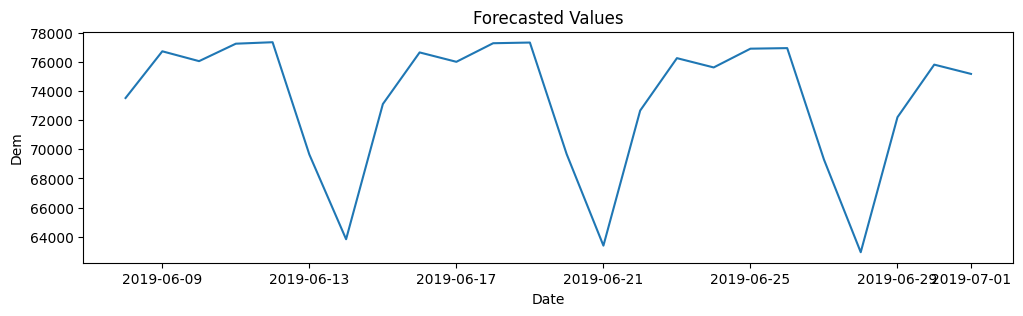

In [114]:
plt.figure(figsize=(12,3))
plt.plot(forecast_mean)
plt.title("Forecasted Values")
plt.xlabel('Date')
plt.ylabel('Dem')
plt.show()

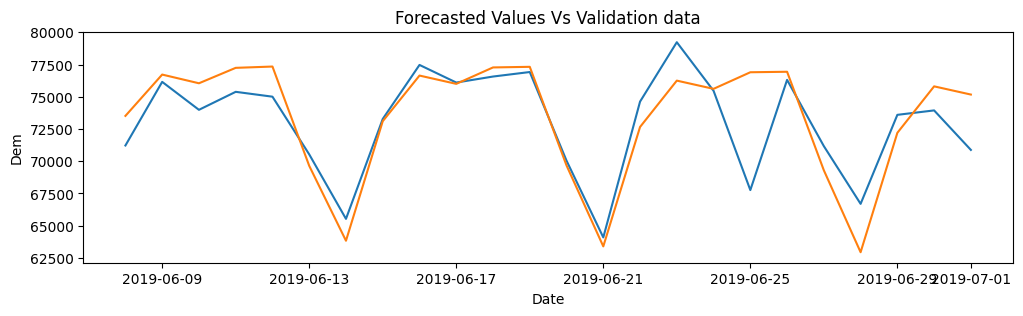

In [118]:
plt.figure(figsize=(12,3))
plt.plot(valid)
plt.plot(forecast_mean)
plt.title("Forecasted Values Vs Validation data")
plt.xlabel('Date')
plt.ylabel('Dem')
plt.show()

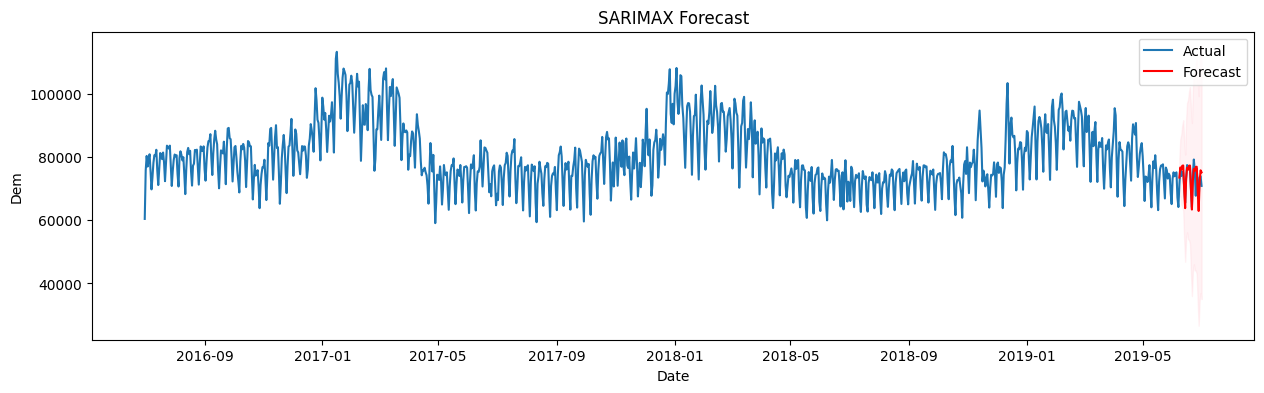

In [119]:
# Plotting actual data and forecasts
plt.figure(figsize=(15, 4))
plt.plot(df1, label='Actual')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Dem')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()


Plotting and checking Residuals

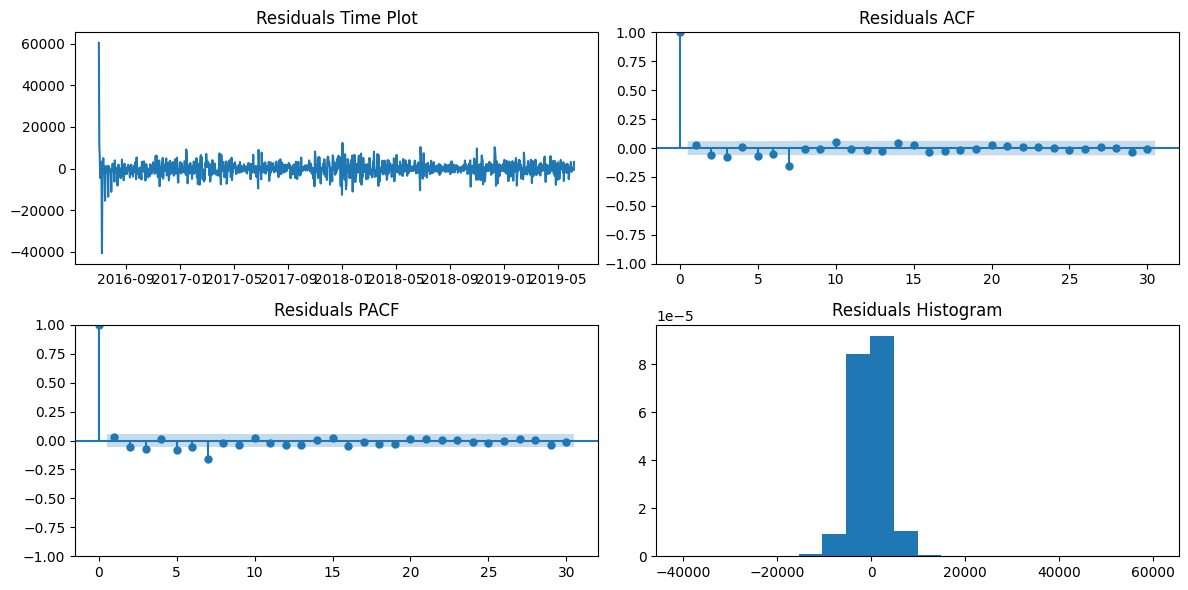

In [121]:
residuals = results.resid

# Residual analysis
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(residuals)
plt.title('Residuals Time Plot')

plt.subplot(2, 2, 2)
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title('Residuals ACF')

plt.subplot(2, 2, 3)
plot_pacf(residuals, lags=30, ax=plt.gca())
plt.title('Residuals PACF')

plt.subplot(2, 2, 4)
plt.hist(residuals, bins=20, density=True)
plt.title('Residuals Histogram')

plt.tight_layout()
plt.show()
